In [ ]:
import numpy as np
import matplotlib.pyplot as plt

showing values of x :  [0.5065955  0.11412767 0.52634393 0.13430513 0.12141921 0.08835001
 0.51724323 0.00444379 0.89216408 0.74439585 0.18419264 0.72286723
 0.59523432 0.95187964 0.27695679 0.43505269 0.95398647 0.33320902
 0.64479291 0.63948439]


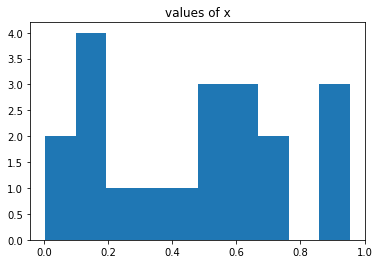

showing values of N :  [ 1.06510773  0.70313713 -0.45806236 -0.78857958 -0.52984258 -0.84608916
  1.07215212  1.11489313  0.11948624  1.02859731  0.44568169  0.24444456
 -0.86562125 -0.30561877  1.55021314  0.42619426 -0.56210217  0.62200473
  1.00214438  0.03476018]


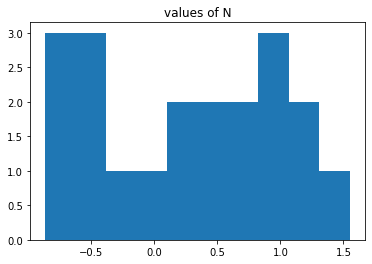

In [ ]:
# rand = np.random.RandomState(20) 
x=np.random.uniform(0,1,20)
print('showing values of x : ',x)

plt.hist(x)
plt.title('values of x')
plt.show()

N=np.random.normal(size=20)
print('showing values of N : ',N)

plt.hist(N)
plt.title('values of N')
plt.show()


Values of y :  [0.17118032297090804, 0.7978880906437485, -0.256804412241356, 0.5895734297086033, 0.5851231274205356, 0.3578881765720981, 0.10588092999601144, 0.25089975161344724, -0.6024247587809445, -0.7936818285922409, 1.0049247993821213, -0.936714234036075, -0.736825317156796, -0.35814693610200166, 1.2956949620125484, 0.4817575235401146, -0.3967761741926047, 0.9906810553573294, -0.5892503704887883, -0.7618254109321836]


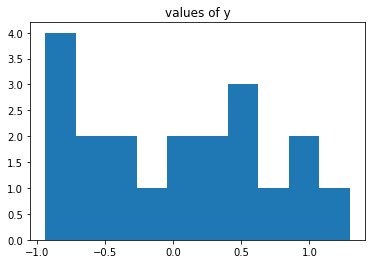

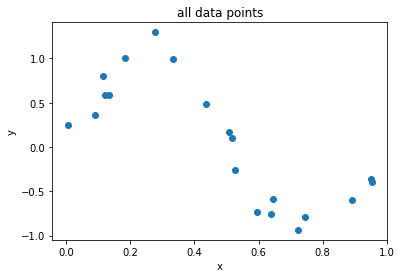

In [ ]:
import math
y=[]
for i in range(20):
  # print(i)
  y.append((math.sin(x[i]*3.142*2))+(N[i])*0.2)
print('Values of y : ',y)

plt.hist(y)
plt.title('values of y')
plt.show()

plt.scatter(x,y)
plt.title('all data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
train_y=[]
test_y=[]
train_x=[]
test_x=[]
for i in range(20):
  if(i%2==0):
    train_y.append(y[i])
    train_x.append(x[i])
  else:
    test_y.append(y[i])
    test_x.append(x[i])

print("training set for y : ",train_y)
print("training set for x : ",train_x)
print("test set for y : ",test_y)
print("test set for x : ",test_x)

train_y=np.array(train_y)
test_y=np.array(test_y)
train_x=np.array(train_x)
test_x=np.array(test_x)

train_x=train_x.reshape(-1, 1)
train_y=train_y.reshape(-1, 1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


# plt.scatter(x,train_y)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# plt.scatter(x,test_set)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()



training set for y :  [0.17118032297090804, -0.256804412241356, 0.5851231274205356, 0.10588092999601144, -0.6024247587809445, 1.0049247993821213, -0.736825317156796, 1.2956949620125484, -0.3967761741926047, -0.5892503704887883]
training set for x :  [0.5065954955910669, 0.5263439330297612, 0.1214192124185125, 0.5172432303376305, 0.8921640831936551, 0.18419264043506622, 0.5952343194155714, 0.2769567933749101, 0.9539864651937019, 0.6447929132040842]
test set for y :  [0.7978880906437485, 0.5895734297086033, 0.3578881765720981, 0.25089975161344724, -0.7936818285922409, -0.936714234036075, -0.35814693610200166, 0.4817575235401146, 0.9906810553573294, -0.7618254109321836]
test set for x :  [0.11412767018169767, 0.13430512749327617, 0.08835000898166301, 0.004443786589970133, 0.7443958469077984, 0.7228672268923204, 0.9518796439477641, 0.43505269159444815, 0.33320901738865893, 0.6394843916912883]


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# train_x=np.array(train_x)
# train_y=np.array(train_y)
# train_x.reshape(-1)
# train_y.reshape(-1)
# polyreg=make_pipeline(PolynomialFeatures(9),LinearRegression())
# polyreg.fit(train_x,train_y)


# reference : https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/
def Regression(i):
    polynomial_features = PolynomialFeatures(degree = i)
    x_transf=polynomial_features.fit_transform(train_x)
    
    model=LinearRegression()
    model.fit(x_transf,train_y)

    y_new=model.predict(x_transf)

    #training error
    rmse=np.sqrt(mean_squared_error(train_y,y_new))
    #test error
    rmse2=np.sqrt(mean_squared_error(test_y,y_new))
    
    r2=r2_score(test_y,y_new)
    
    print('RMSE of degree ',i,': ',rmse2)
    print('R2 of degree ',i,': ',r2)

    return polynomial_features, model





In [ ]:
polynomial0, model0 = Regression(0)
weights0=model0.coef_ #https://stackoverflow.com/questions/47303261/getting-weights-of-features-using-scikit-learn-logistic-regression
w0=weights0.copy()
w0.resize(10,refcheck=False) #https://stackoverflow.com/questions/38191855/zero-pad-numpy-array
print('weights for degree 0: ',w0)

polynomial1, model1 = Regression(1)
weights1=model1.coef_  
w1=weights1.copy()
w1.resize(10,refcheck=False)
print('weights for degree 1: ',w1)

polynomial3, model3 = Regression(3)
weights3=model3.coef_
w3=weights3.copy()
w3.resize(10,refcheck=False)
print('weights for degree 3: ',w3)

polynomial9, model9 = Regression(9)
weights9=model9.coef_
w9=weights9.copy()
w9.resize(10,refcheck=False)
print('weights for degree 9: ',w9)


RMSE of degree  0 :  0.6757748998054574
R2 of degree  0 :  -3.095311539746959e-05
weights for degree 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RMSE of degree  1 :  0.8812007036292655
R2 of degree  1 :  -0.700430943644264
weights for degree 1:  [ 0.         -2.08588249  0.          0.          0.          0.
  0.          0.          0.          0.        ]
RMSE of degree  3 :  0.8288670295347729
R2 of degree  3 :  -0.5044545024311573
weights for degree 3:  [  0.          19.13481046 -49.59044887  31.84488751   0.
   0.           0.           0.           0.           0.        ]
RMSE of degree  9 :  0.88028613143296
R2 of degree  9 :  -0.6969031211504679
weights for degree 9:  [ 0.00000000e+00 -5.15004633e+05  5.62522625e+06 -3.33866950e+07
  1.19621482e+08 -2.70415048e+08  3.88273313e+08 -3.43304079e+08
  1.70341143e+08 -3.62628790e+07]


In [ ]:
# https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

from prettytable import PrettyTable

mytable=PrettyTable()

columns=['','Order 0','Order 1','Order 3','Order 9']

mytable.add_column(columns[0],['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9'])
mytable.add_column(columns[1],w0)
mytable.add_column(columns[2],w1)
mytable.add_column(columns[3],w3)
mytable.add_column(columns[4],w9)

print(mytable)

+----+---------+--------------------+---------------------+---------------------+
|    | Order 0 |      Order 1       |       Order 3       |       Order 9       |
+----+---------+--------------------+---------------------+---------------------+
| W0 |   0.0   |        0.0         |         0.0         |         0.0         |
| W1 |   0.0   | -2.085882487390529 |  19.134810457045457 | -515004.63279339066 |
| W2 |   0.0   |        0.0         | -49.590448870417305 |  5625226.251401764  |
| W3 |   0.0   |        0.0         |  31.844887505116315 | -33386695.008260697 |
| W4 |   0.0   |        0.0         |         0.0         |  119621482.41552813 |
| W5 |   0.0   |        0.0         |         0.0         |  -270415047.5128739 |
| W6 |   0.0   |        0.0         |         0.0         |  388273313.46595275 |
| W7 |   0.0   |        0.0         |         0.0         |  -343304079.1551127 |
| W8 |   0.0   |        0.0         |         0.0         |  170341143.46188554 |
| W9 |   0.0   |

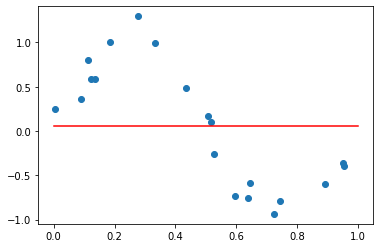

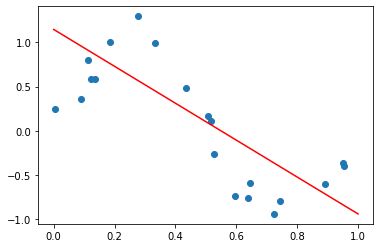

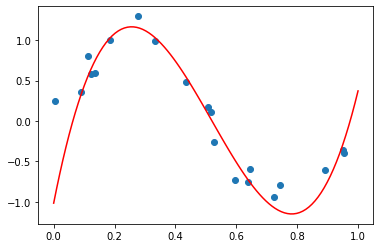

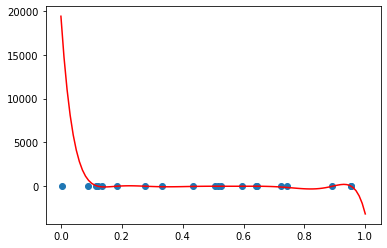

In [ ]:
xnew=np.linspace(0,1,100)
xnew=np.array(xnew)
xnew=xnew.reshape(-1,1)
x_trans0=polynomial0.fit_transform(xnew)
y0=model0.predict(x_trans0)
plt.scatter(x,y)
plt.plot(xnew,y0,c='r')
plt.show()


x_trans1=polynomial1.fit_transform(xnew)
y1=model1.predict(x_trans1)
plt.scatter(x,y)
plt.plot(xnew,y1,c='r')
plt.show()

x_trans3=polynomial3.fit_transform(xnew)
y3=model3.predict(x_trans3)
plt.scatter(x,y)
plt.plot(xnew,y3,c='r')
plt.show()

x_trans9=polynomial9.fit_transform(xnew)
y9=model9.predict(x_trans9)
plt.scatter(x,y)
plt.plot(xnew,y9,c='r')
plt.show()


[0.6718839839061639, 0.3949820650144116, 0.362185294183138, 0.15509957090719734, 0.1257616863153283, 0.11667502425249053, 0.11033312782105564, 0.05139960801508042, 0.045984709291081345, 2.7116532461094445e-08]
[0.6757748998054574, 0.5130767396803901, 0.6430332529224712, 0.40209758302055293, 0.7368997594930184, 0.3663105838641724, 0.5101256658169809, 6.711239341941148, 37.9374792351037, 5445.918996816799]


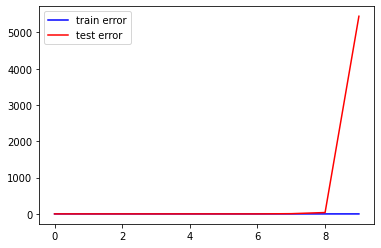

In [ ]:
train_errors=[]
test_errors=[]
# print(test_x.shape)
# print(test_y.shape)

for i in range (0,10):
  polynomial_features = PolynomialFeatures(degree = i)
  x_transf=polynomial_features.fit_transform(train_x)
    
  model=LinearRegression()
  model.fit(x_transf,train_y)

  y_new=model.predict(x_transf)

  #training error
  rmse=np.sqrt(mean_squared_error(train_y,y_new))
  #test error
  x_transf=polynomial_features.fit_transform(test_x)
  y_new=model.predict(x_transf)
  rmse2=np.sqrt(mean_squared_error(test_y,y_new))

  train_errors.append(rmse)
  test_errors.append(rmse2)


print(train_errors)
print(test_errors)
models= np.linspace(0, 9, 10)
plt.plot(models,train_errors,label = 'train error', color = 'blue')
plt.plot(models,test_errors,label = 'test error', color = 'red')
plt.legend()
plt.show()






showing values of x :  [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.8787

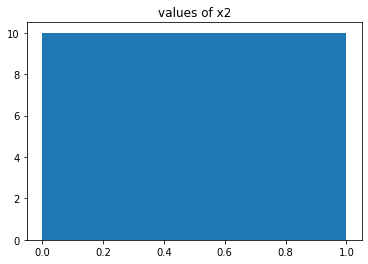

showing values of n2 :  [-1.55866377e+00 -1.36082128e+00 -1.05110994e+00  1.04086891e+00
  2.96452186e-01 -1.05815554e+00  1.02215584e+00  7.60582413e-01
  1.95520316e-01  9.15855074e-01  1.19469760e+00  1.08410113e+00
  1.03857214e-01  5.98172298e-01 -4.46541456e-01 -2.80242879e-01
 -2.67079929e+00 -2.78362843e+00 -2.52092922e-01  5.87267337e-01
  3.51216092e-01  1.26619371e+00  6.17943671e-01 -1.44713393e+00
 -1.25583113e+00  1.42049206e+00 -1.11409691e+00 -4.55209331e-01
 -3.44930931e-01 -1.46415939e+00 -1.04930766e+00 -1.52506917e+00
  1.02117993e+00  6.25609487e-02 -8.40164086e-01  5.24914195e-01
  6.09723066e-01  8.19633625e-01 -7.27630828e-01  4.75948243e-01
 -1.64089928e+00  4.39467458e-01  4.21874275e-01 -1.34377280e-01
  1.33547374e+00  5.53856620e-02 -2.54380300e-04  9.48876627e-01
  8.90043657e-01 -1.78931297e-01 -9.16446072e-01  9.90562129e-01
  8.88212853e-01  1.69680671e-01  8.14319143e-01  6.12007163e-01
  1.39683318e-01  8.71915540e-01 -7.63908904e-01 -1.17811912e+00
 

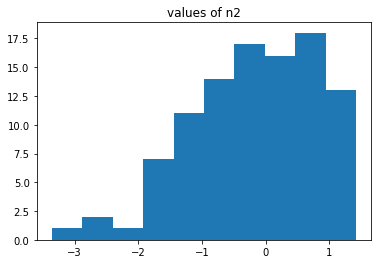

In [ ]:
# x2=np.random.uniform(0,1,100)
x2=np.linspace(0,1,100)
n2=np.random.normal(size=100)

print('showing values of x : ',x2)

plt.hist(x2)
plt.title('values of x2')
plt.show()

print('showing values of n2 : ',n2)

plt.hist(n2)
plt.title('values of n2')
plt.show()


Values of y2 :  [-0.3117327532333845, -0.2087321237010215, -0.08361320756022472, 0.3974492687128643, 0.3104702861353639, 0.10044142819925178, 0.5761394617072048, 0.581963406665068, 0.5253583271126174, 0.7238741365917095, 0.8319137142946355, 0.8596771765088341, 0.7109219200919744, 0.8542987508380389, 0.6869108133829285, 0.7585989713174226, 0.3156349828291035, 0.32479373814101953, 0.8592749347810785, 1.0516571172768014, 1.0251943153815195, 1.225091038921837, 1.1084279088007505, 0.7044326395540844, 0.7477104914536655, 1.283969255314285, 0.7740184140652548, 0.8987479304584214, 0.909769042934862, 0.6709466594277712, 0.7350585124815525, 0.6172418704097319, 1.1001127901453875, 0.8784017794561514, 0.6643820215540022, 0.9005702172282631, 0.8775001506965499, 0.8764072775392451, 0.5210097503891915, 0.713096327364823, 0.23860884836693852, 0.6012813720422497, 0.5422941436365291, 0.37373088330499327, 0.608774620541279, 0.29245435537410486, 0.21989039772205776, 0.34739479455999395, 0.2726715533827463

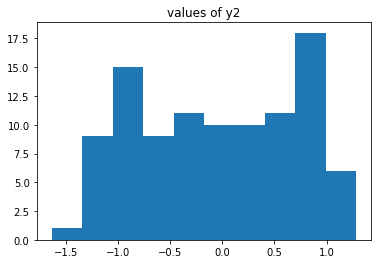

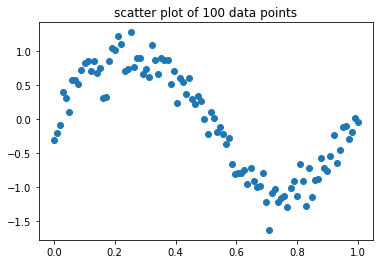

In [ ]:
y2=[]
for i in range(100):
  # print(i)
  y2.append((math.sin(x2[i]*3.142*2))+(n2[i])*0.2)
print('Values of y2 : ',y2)

plt.hist(y2)
plt.title('values of y2')
plt.show()

plt.scatter(x2,y2)
plt.title('scatter plot of 100 data points')
plt.show()

x2=np.array(x2)
y2=np.array(y2)
x2=x2.reshape(-1,1)
y2=y2.reshape(-1,1)



<function matplotlib.pyplot.show>

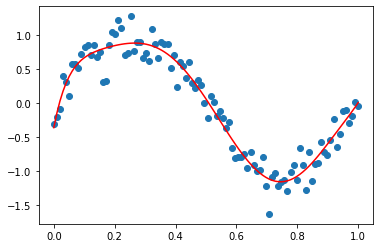

In [ ]:
polynomial_features2=PolynomialFeatures(degree=9)
x_transf2=polynomial_features2.fit_transform(x2)
model2=LinearRegression()
model2.fit(x_transf2,y2)

y2new=model2.predict(x_transf2)

xnew=np.linspace(0,1,100)
plt.plot(xnew,y2new,c='r')
plt.scatter(x2,y2)
plt.show


In [47]:
from sklearn.linear_model import Ridge
#https://inria.github.io/scikit-learn-mooc/python_scripts/linear_models_regularization.html
def l2ridge(x2,y2,alpha):
  # x2=x2.reshape(100,1)
  # y2=y2.reshape(100,1)  
  # polynomial_features3=PolynomialFeatures(degree=9)
  ridge = make_pipeline(PolynomialFeatures(degree=9),
                      Ridge(alpha=alpha))
  # transform=polynomial_features3.fit_transform(x2)
  # ridge=Ridge(alpha=alpha)
  ridge.fit(x2,y2)
  result=ridge.predict(x2)
  return result


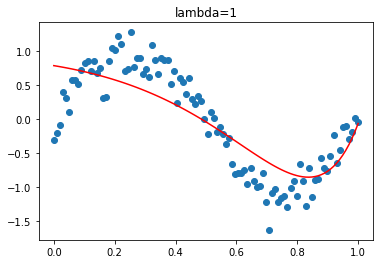

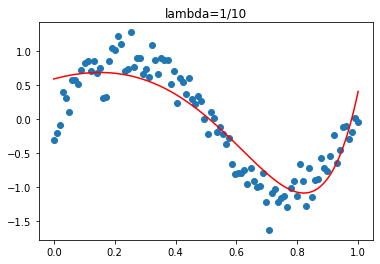

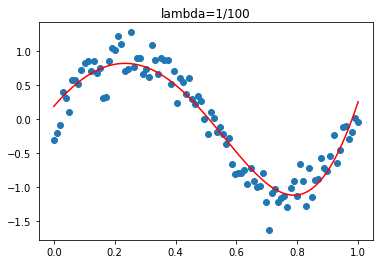

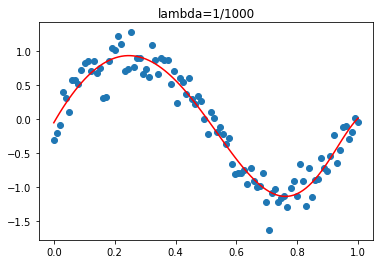

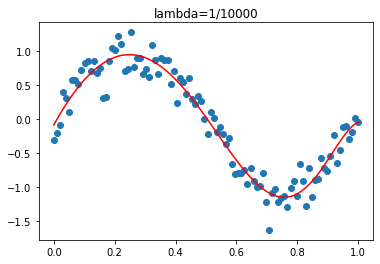

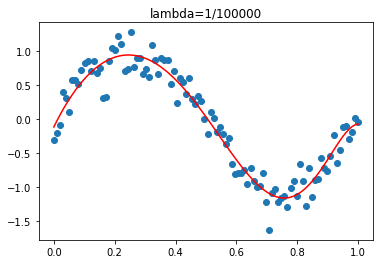

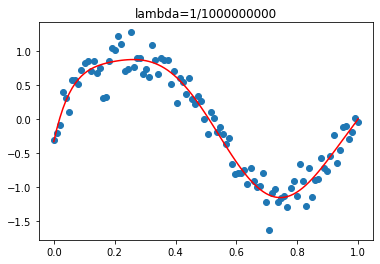

In [64]:
y2new1=l2ridge(x2,y2,1)
plt.scatter(x2,y2)
plt.plot(xnew,y2new1,c='r')
plt.title('lambda=1')
plt.show()

y2new10=l2ridge(x2,y2,1/10)
plt.scatter(x2,y2)
plt.plot(xnew,y2new10,c='r')
plt.title('lambda=1/10')
plt.show()

y2new100=l2ridge(x2,y2,1/100)
plt.scatter(x2,y2)
plt.plot(xnew,y2new100,c='r')
plt.title('lambda=1/100')
plt.show()

y2new1000=l2ridge(x2,y2,1/1000)
plt.scatter(x2,y2)
plt.plot(xnew,y2new1000,c='r')
plt.title('lambda=1/1000')
plt.show()

y2new10000=l2ridge(x2,y2,1/10000)
plt.scatter(x2,y2)
plt.plot(xnew,y2new10000,c='r')
plt.title('lambda=1/10000')
plt.show()

y2new100000=l2ridge(x2,y2,1/100000)
plt.scatter(x2,y2)
plt.plot(xnew,y2new100000,c='r')
plt.title('lambda=1/100000')
plt.show()

y2new1000000000=l2ridge(x2,y2,1/1000000000)
plt.scatter(x2,y2)
plt.plot(xnew,y2new1000000000,c='r')
plt.title('lambda=1/1000000000')
plt.show()



[0.6718839839061639, 0.3949820650144116, 0.362185294183138, 0.15509957090719734, 0.1257616863153283, 0.11667502425249053, 0.11033312782105564, 0.05139960801508042, 0.045984709291081345, 2.7116532461094445e-08, 0.47192413197971267, 0.32128134170725847, 0.28127959302707284, 0.2179731253291989, 0.13605004887597574, 0.12064960301690789]
[0.6757748998054574, 0.5130767396803901, 0.6430332529224712, 0.40209758302055293, 0.7368997594930184, 0.3663105838641724, 0.5101256658169809, 6.711239341941148, 37.9374792351037, 5445.918996816799, 0.765855381457417, 0.811907157629594, 0.8254786616089237, 0.8193760886027394, 0.8477361344111135, 0.8691124550536647]


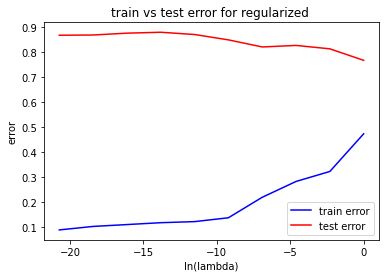

In [63]:
regularised_train_error=[]
regularised_test_error=[]
alphas=[1,1/10,1/100,1/1000,1/10000,1/100000,1/1000000,1/10000000,1/100000000,1/1000000000]
for alpha in alphas:
  
  # polynomial_features = PolynomialFeatures(degree = i)
  # x_transf=polynomial_features.fit_transform(train_x)
    
  # model=LinearRegression()
  # model.fit(x_transf,train_y)

  # y_new=model.predict(x_transf)
  ridge = make_pipeline(PolynomialFeatures(degree=9),
                      Ridge(alpha=alpha))
  ridge.fit(train_x,train_y)
  ynew=ridge.predict(train_x)

  #training error
  rmse=np.sqrt(mean_squared_error(train_y,ynew))
  #test error
  y2newtest=ridge.predict(test_x)
  rmse2=np.sqrt(mean_squared_error(test_y,ynew))

  regularised_train_error.append(rmse)
  regularised_test_error.append(rmse2)


print(train_errors)
print(test_errors)
logalpha=[np.log(1),np.log(1/10),np.log(1/100),np.log(1/1000),np.log(1/10000),np.log(1/100000),np.log(1/1000000),np.log(1/10000000),np.log(1/100000000),np.log(1/1000000000)]
plt.plot(logalpha,regularised_train_error,label = 'train error', color = 'blue')
plt.plot(logalpha,regularised_test_error,label = 'test error', color = 'red')
plt.title('train vs test error for regularized ')
plt.xlabel('ln(lambda)')
plt.ylabel('error')
plt.legend()
plt.show()

###Based on best performance my model will be the one with lambda 1/1000000000